In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

## TASK 3

In [66]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### The following describes the dataset variables:
###### CRIM - per capita crime rate by town
###### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
###### INDUS - proportion of non-retail business acres per town.
###### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
###### NOX - nitric oxides concentration (parts per 10 million)
###### RM - average number of rooms per dwelling
###### AGE - proportion of owner-occupied units built prior to 1940
###### DIS - weighted distances to five Boston employment centres
###### RAD - index of accessibility to radial highways
###### TAX - full-value property-tax rate per $10,000
###### PTRATIO - pupil-teacher ratio by town
###### LSTAT - % lower status of the population
###### MEDV - Median value of owner-occupied homes in $1000's

In [67]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## TASK 4

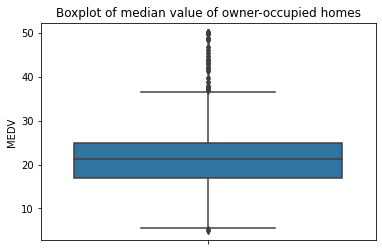

In [68]:
# For the "Median value of owner-occupied homes" provide a boxplot.
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Boxplot of median value of owner-occupied homes')
plt.show()

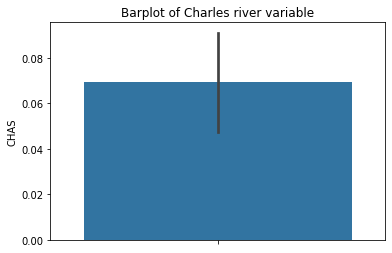

In [69]:
# Provide a  bar plot for the Charles river variable.
ax = sns.barplot(y='CHAS', data=boston_df)
ax.set_title('Barplot of Charles river variable')
plt.show()

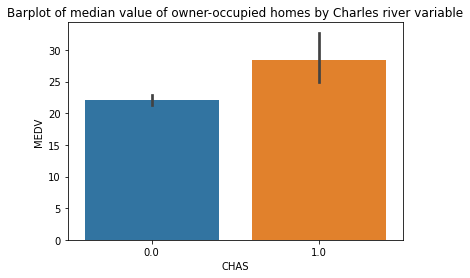

In [70]:
# Provide a  bar plot for the Charles river variable.
ax = sns.barplot(y='MEDV', x='CHAS', data=boston_df)
ax.set_title('Barplot of median value of owner-occupied homes by Charles river variable')
plt.show()

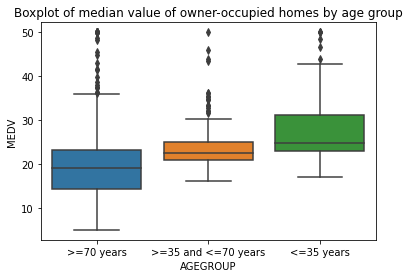

In [71]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older).
boston_df.loc[(boston_df['AGE'] <= 35), 'AGEGROUP'] = '<=35 years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGEGROUP'] = '>=35 and <=70 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'AGEGROUP'] = '>=70 years'
ax = sns.boxplot(x='AGEGROUP', y='MEDV', data=boston_df)
ax.set_title('Boxplot of median value of owner-occupied homes by age group')
plt.show()

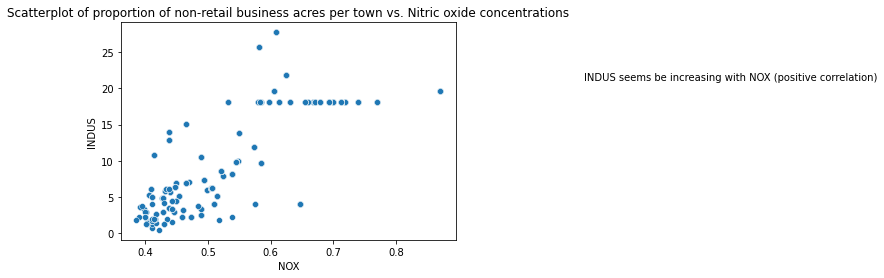

In [72]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('Scatterplot of proportion of non-retail business acres per town vs. Nitric oxide concentrations')
textstr = 'INDUS seems be increasing with NOX (positive correlation)'
ax.text(1.1, 21.1, textstr)
plt.show()

c:\Users\Bhat Anjana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


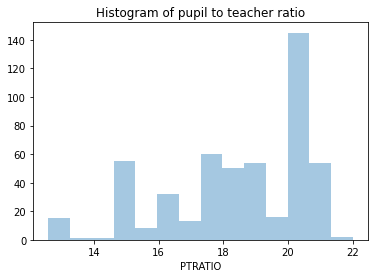

In [73]:
# Create a histogram for the pupil to teacher ratio variable.
ax = sns.distplot(boston_df['PTRATIO'], kde=False)
ax.set_title('Histogram of pupil to teacher ratio')
plt.show()

## TASK 5

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


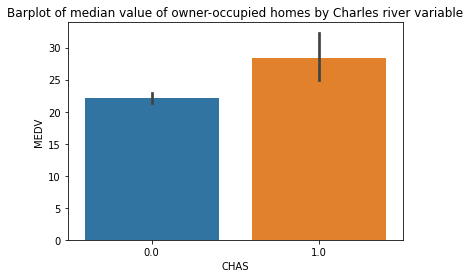

In [78]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Hypothesis:
#   Null hypothesis: µ1 = µ2 ("there is no difference in median value of houses bounded by the Charles river")
#   Alternate hypothesis: µ1 ≠ µ2 ("there is a difference in in median value of houses bounded by the Charles river")
foo = sp.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
print(foo)
# Since the p-value is less than 0.05, we cannot assume equality of variance.
foo = sp.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)
print(foo)
# Conclusion:
#   Since the p-value is less than alpha value of 0.05, we reject the null hypothesis as there is enough proof that 
#   there is a statistical difference in median value of houses bounded by the Charles river.
# Plot data.
ax = sns.barplot(y='MEDV', x='CHAS', data=boston_df)
ax.set_title('Barplot of median value of owner-occupied homes by Charles river variable')
plt.show()

LeveneResult(statistic=2.5062577818017884, pvalue=0.0825911787428735)
F_Statistic: 29.028583208977576, P-Value: 1.1723548056383608e-12


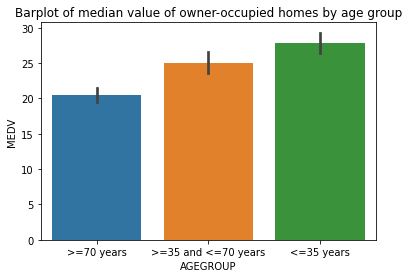

In [79]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
# (ANOVA)
# Hypothesis:
#   Null hypothesis: µ1 = µ2 = µ3 (the three population means are equal)
#   Alternate hypothesis: At least one of the means differ
foo = sp.stats.levene(boston_df[boston_df['AGEGROUP'] == '<=35 years']['MEDV'],
                   boston_df[boston_df['AGEGROUP'] == '>=35 and <=70 years']['MEDV'], 
                   boston_df[boston_df['AGEGROUP'] == '>=70 years']['MEDV'], 
                   center='mean')
print(foo)
# Since the p-value is greater than 0.05, we can assume equality of variance.
f_statistic, p_value = sp.stats.f_oneway(
    boston_df[boston_df['AGEGROUP'] == '<=35 years']['MEDV'],
    boston_df[boston_df['AGEGROUP'] == '>=35 and <=70 years']['MEDV'],
    boston_df[boston_df['AGEGROUP'] == '>=70 years']['MEDV']
)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
# Conclusion:
#   Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that 
#   at least one of the means differ.
# Plot data.
ax = sns.barplot(y='MEDV', x='AGEGROUP', data=boston_df)
ax.set_title('Barplot of median value of owner-occupied homes by age group')
plt.show()

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)


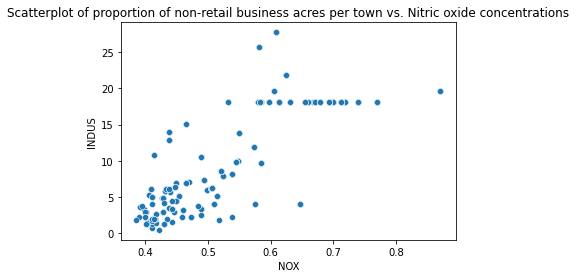

In [82]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
# (Pearson Correlation)
# Hypothesis:
#   Null hypothesis: Proportion of non-retail business acres per town is not correlated with Nitric oxide concentrations
#   Alternate hypothesis: Proportion of non-retail business acres per town is correlated with Nitric oxide concentrations
foo = sp.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(foo)
# Conclusion:
#   Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that 
#   there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
# Plot data.
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('Scatterplot of proportion of non-retail business acres per town vs. Nitric oxide concentrations')
plt.show()

In [86]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 
# (Regression analysis)
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()
# Conclusion:
#   As p < 0.05, there is evidence of correlation between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
#   As the coefficient for DIS is positive, median value of owner occupied homes increases with additional weighted distance to the five Boston employment centres.
#   Correlation between the two variables would also be positive (sqrt(R2) = 0.25).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        21:01:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""